In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data1 = pd.DataFrame([159.5, 120.7, 279.0], index=[1,2,'sz'], columns=['R'])
data2 = pd.DataFrame()
data2['U'] = [[3.3, 4.79, 6.36, 7.91, 9.6, 12.45],[10.5, 17.6, 22.2, 27.3, 33.6, 43.5]][0]
data2['I'] = [[3.3, 4.79, 6.36, 7.91, 9.6, 12.45],[10.5, 17.6, 22.2, 27.3, 33.6, 43.5]][1]
data2['I'] *= 1e-3

data1

,R
1,159.5
2,120.7
sz,279.0


In [3]:
data1['uR'] = [1.576, 1.2656, 3.232]
data1['uR'] /= np.sqrt(3)

def calc_Dp_U(x):
    return 0.5/100 * x + 1 * 10e-3

def calc_Dp_I(x):
    return 1.2/100 * x + 1 * 100e-6

def calc_uB(Deltas):
    s = 0
    for D in Deltas:
        s += D**2 / 3
    return np.sqrt(s)


data2['uU'] = calc_uB([ calc_Dp_U(data2['U']) ])
data2['uI'] = calc_uB([ calc_Dp_I(data2['I']) ])
data1

,R,uR
1,159.5,0.909904
2,120.7,0.730695
sz,279.0,1.865996


In [4]:
R_12 = data1['R'].loc[1] + data1['R'].loc[2]
uR_12 = np.sqrt(data1['uR'].loc[1]**2 +  data1['uR'].loc[2]**2)
print(R_12, uR_12) #zrobić wykres
data2

280.2 1.1669789144053404


,U,I,uU,uI
0,3.30,0.0105,0.015300,0.000130
1,4.79,0.0176,0.019601,0.000180
2,6.36,0.0222,0.024133,0.000212
3,7.91,0.0273,0.028608,0.000247
4,9.60,0.0336,0.033486,0.000291
5,12.45,0.0435,0.041714,0.000359


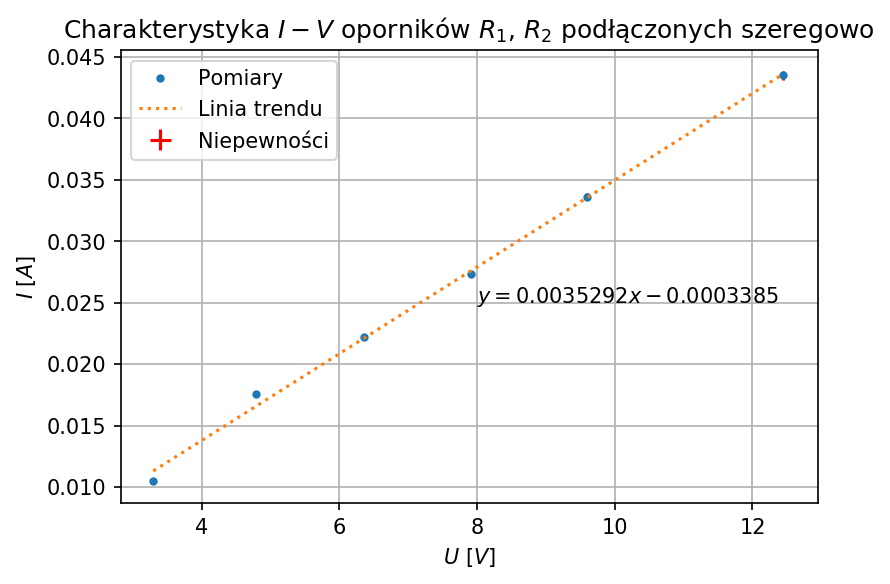

In [5]:
plt.rcParams['figure.dpi'] = 150
x = data2['U']
y = data2['I']
xerr = data2['uU']
yerr = data2['uI']

plt.plot(x,y, ".", label="Pomiary")
plt.errorbar(x=x, y=y, xerr=xerr, yerr=yerr, fmt=" ", label="Niepewności", color="Red")

p, V = np.polyfit(x,y, deg=1, cov=True)

R_lin = 1 / p[0]
uR_lin = np.sqrt((-1 / p[0]**2)**2 * V[0][0])

plt.plot(x, p[0]*x + p[1], ':', label="Linia trendu")
plt.text(8,0.025,"$y = {:.7f}x {:.7f} $".format(p[0], p[1]))

plt.grid(b=True)
plt.title("Charakterystyka $I-V$ oporników $R_1$, $R_2$ podłączonych szeregowo")
plt.xlabel("$U\ [V]$")
plt.ylabel("$I\ [A]$")
plt.legend()
plt.savefig("charIV.png", dpi=600, bbox_inches='tight')
plt.show()


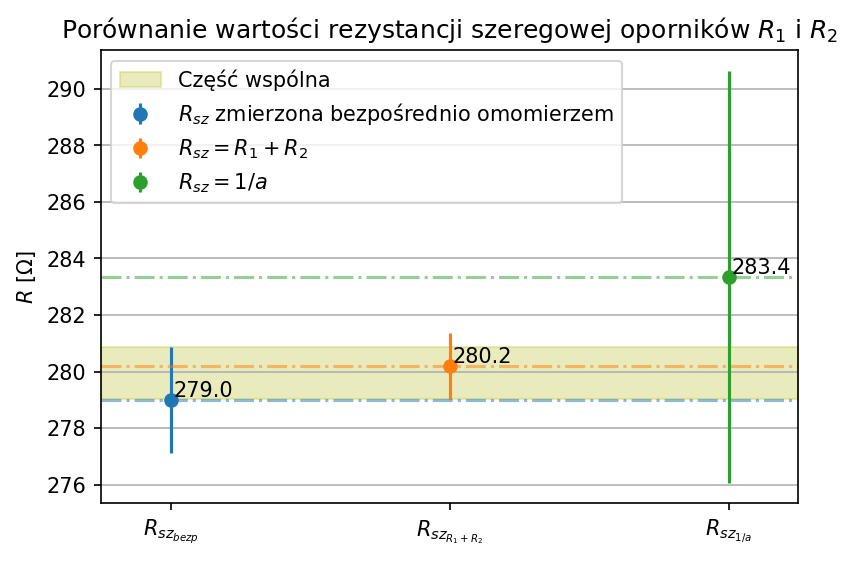

In [44]:
plt.rcParams['figure.dpi'] = 150

plt.errorbar(x=["$R_{sz_{bezp}}$"], y=data1['R'].loc['sz'], yerr=data1['uR'].loc['sz'], fmt="o", label="$R_{sz}$ zmierzona bezpośrednio omomierzem")
plt.text(0.01, data1['R'].loc['sz']+0.1, "{:.1f}".format(data1['R'].loc['sz']))
plt.errorbar(x=["$R_{sz_{R_1+R_2}}$"], y = R_12, yerr = uR_12, fmt="o", label="$R_{sz} = R_1 + R_2$")
plt.text(1.01, R_12+0.1, "{:.1f}".format(R_12))
plt.errorbar(x=["$R_{sz_{1/a}}$"], y = R_lin, yerr = uR_lin, fmt="o", label="$R_{sz} = 1/a$")
plt.text(2.01, R_lin+0.1, "{:.1f}".format(R_lin))

#plt.errorbar(x=["R_{+b}"], y=[R_lin+p[1]], yerr=uR_lin, fmt="o" )

x0 = np.linspace(-0.25, 2.25, 10)
plt.plot(x0, np.ones(10) * data1['R'].loc['sz'], '-.', color="C0", alpha=0.5)
plt.plot(x0, np.ones(10) * R_12, '-.', color="C1", alpha=0.5)
plt.plot(x0, np.ones(10) * R_lin, '-.', color="C2", alpha=0.5)

plt.fill_between(x0, np.ones(10) * (R_12 - uR_12), np.ones(10) * (data1['R'].loc['sz'] + data1['uR'].loc['sz']), color="C8", alpha=0.3, label="Część wspólna")

plt.xlim(left=-0.25, right=2.25)
plt.grid(b=True, axis="y")
plt.title("Porównanie wartości rezystancji szeregowej oporników $R_1$ i $R_2$")
plt.ylabel("$R\ [\Omega]$")
plt.legend(loc=2)
plt.savefig("R_comp.png", dpi=600, bbox_inches='tight')
plt.show()

In [29]:
i=0
print(p[i], np.sqrt(V[i][i]))
uR_12

0.0035291861051351316 9.070298203208687e-05


1.1669789144053404

In [8]:
wynik1 = data1.copy()
wynik2 = data2.copy()
print( wynik2[['U', 'uU', 'I', 'uI']].to_latex(caption="asdf", label="tab:num", index=False) )

\begin{table}
\centering
\caption{asdf}
\label{tab:num}
\begin{tabular}{rrrr}
\toprule
     U &        uU &       I &        uI \\
\midrule
  3.30 &  0.015300 &  0.0105 &  0.000130 \\
  4.79 &  0.019601 &  0.0176 &  0.000180 \\
  6.36 &  0.024133 &  0.0222 &  0.000212 \\
  7.91 &  0.028608 &  0.0273 &  0.000247 \\
  9.60 &  0.033486 &  0.0336 &  0.000291 \\
 12.45 &  0.041714 &  0.0435 &  0.000359 \\
\bottomrule
\end{tabular}
\end{table}

